In [31]:
#sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandapower as pp
import pandapower.networks as net
import pandapower.topology as top
import pandapower.plotting as plot
from pandapower.plotting.plotly import simple_plotly
import pandapower.converter
import pandapower.estimation

pd.set_option('display.max_columns', 100)

# Power System - case39

In [2]:
net = pandapower.networks.case39()
net

This pandapower network includes the following parameter tables:
   - bus (39 elements)
   - load (21 elements)
   - gen (9 elements)
   - ext_grid (1 element)
   - line (35 elements)
   - trafo (11 elements)
   - poly_cost (10 elements)
   - bus_geodata (39 elements)

In [3]:
net.bus = net.bus.sort_index()
net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,345.0,2.0
1,True,1.06,0.94,2,b,345.0,2.0
2,True,1.06,0.94,3,b,345.0,2.0
3,True,1.06,0.94,4,b,345.0,1.0
4,True,1.06,0.94,5,b,345.0,1.0
5,True,1.06,0.94,6,b,345.0,1.0
6,True,1.06,0.94,7,b,345.0,1.0
7,True,1.06,0.94,8,b,345.0,1.0
8,True,1.06,0.94,9,b,345.0,1.0
9,True,1.06,0.94,10,b,345.0,1.0


In [4]:
net.load = net.load.sort_index()
net.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,0,0.0,0.0,False,True,None,97.60,44.2,1.0,NaN,None
1,2,0.0,0.0,False,True,None,322.00,2.4,1.0,NaN,None
2,3,0.0,0.0,False,True,None,500.00,184.0,1.0,NaN,None
3,6,0.0,0.0,False,True,None,233.80,84.0,1.0,NaN,None
4,7,0.0,0.0,False,True,None,522.00,176.6,1.0,NaN,None
5,8,0.0,0.0,False,True,None,6.50,-66.6,1.0,NaN,None
6,11,0.0,0.0,False,True,None,8.53,88.0,1.0,NaN,None
7,14,0.0,0.0,False,True,None,320.00,153.0,1.0,NaN,None
8,15,0.0,0.0,False,True,None,329.00,32.3,1.0,NaN,None
9,17,0.0,0.0,False,True,None,158.00,30.0,1.0,NaN,None


In [5]:
pp.create_sgen(net, bus=1, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=11, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=14, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=21, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=23, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=28, p_mw=210, q_mvar=70, controllable=False)

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable
0,None,1,210.0,70.0,NaN,1.0,True,wye,True,False
1,None,11,210.0,70.0,NaN,1.0,True,wye,True,False
2,None,14,210.0,70.0,NaN,1.0,True,wye,True,False
3,None,21,210.0,70.0,NaN,1.0,True,wye,True,False
4,None,23,210.0,70.0,NaN,1.0,True,wye,True,False
5,None,28,210.0,70.0,NaN,1.0,True,wye,True,False


In [6]:
net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,29,True,True,None,250.0,1.0,NaN,None,1.0499,False,1040.0,0.0,400.0,140.0,0.0
1,31,True,True,None,650.0,1.0,NaN,None,0.9841,False,725.0,0.0,300.0,150.0,0.0
2,32,True,True,None,632.0,1.0,NaN,None,0.9972,False,652.0,0.0,250.0,0.0,0.0
3,33,True,True,None,508.0,1.0,NaN,None,1.0123,False,508.0,0.0,167.0,0.0,0.0
4,34,True,True,None,650.0,1.0,NaN,None,1.0494,False,687.0,0.0,300.0,-100.0,0.0
5,35,True,True,None,560.0,1.0,NaN,None,1.0636,False,580.0,0.0,240.0,0.0,0.0
6,36,True,True,None,540.0,1.0,NaN,None,1.0275,False,564.0,0.0,250.0,0.0,0.0
7,37,True,True,None,830.0,1.0,NaN,None,1.0265,False,865.0,0.0,300.0,-150.0,0.0
8,38,True,True,None,1000.0,1.0,NaN,None,1.0300,False,1100.0,0.0,300.0,-100.0,0.0


In [7]:
net.ext_grid 

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,30,True,None,0.0,0.982,646.0,0.0,300.0,-100.0,1.0


In [8]:
net.line = net.line.sort_index()
net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,1557.117675,1.0,0,0.0,True,1.0,1.004087,100.0,None,1,4.165875,None,1,ol,48.919275
1,1671.444477,1.0,0,0.0,True,1.0,1.673479,100.0,None,1,1.190250,None,38,ol,29.756250
2,573.194026,1.0,1,0.0,True,1.0,0.836740,100.0,None,1,1.547325,None,2,ol,17.972775
3,325.374525,1.0,1,0.0,True,1.0,0.836740,100.0,None,1,8.331750,None,24,ol,10.236150
4,493.410410,1.0,2,0.0,True,1.0,0.836740,100.0,None,1,1.547325,None,3,ol,25.352325
5,476.473106,1.0,2,0.0,True,1.0,0.836740,100.0,None,1,1.309275,None,17,ol,15.830325
6,299.077132,1.0,3,0.0,True,1.0,1.004087,100.0,None,1,0.952200,None,4,ol,15.235200
7,307.991502,1.0,3,0.0,True,1.0,0.836740,100.0,None,1,0.952200,None,13,ol,15.354225
8,96.720920,1.0,4,0.0,True,1.0,2.008175,100.0,None,1,0.238050,None,5,ol,3.094650
9,328.940273,1.0,4,0.0,True,1.0,1.506131,100.0,None,1,0.952200,None,7,ol,13.330800


In [9]:
net.trafo = net.trafo.sort_index()
net.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,sn_mva,std_type,tap_max,tap_neutral,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,1,0.0,True,29,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,16.290000,0.00
1,1.0,5,0.0,True,30,100.0,None,1,0.0,0.0,1800.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,45.000000,0.00
2,1.0,9,0.0,True,31,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,18.000000,0.00
3,1.0,11,0.0,True,10,100.0,None,1,0.0,0.0,500.0,None,NaN,0,NaN,False,1,hv,NaN,0.6,345.0,345.0,21.764708,0.80
4,1.0,11,0.0,True,12,100.0,None,1,0.0,0.0,500.0,None,NaN,0,NaN,False,1,hv,NaN,0.6,345.0,345.0,21.764708,0.80
5,1.0,18,0.0,True,19,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,6.0,345.0,345.0,12.435968,0.63
6,1.0,18,0.0,True,32,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,12.795519,0.63
7,1.0,19,0.0,True,33,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,0.9,345.0,345.0,16.220237,0.81
8,1.0,21,0.0,True,34,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,12.870000,0.00
9,1.0,24,0.0,True,36,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,20.886982,0.54


In [10]:
net.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,gen,0.2,0.3,0.01,0.0,0.0,0.0
1,0,ext_grid,0.2,0.3,0.01,0.0,0.0,0.0
2,1,gen,0.2,0.3,0.01,0.0,0.0,0.0
3,2,gen,0.2,0.3,0.01,0.0,0.0,0.0
4,3,gen,0.2,0.3,0.01,0.0,0.0,0.0
5,4,gen,0.2,0.3,0.01,0.0,0.0,0.0
6,5,gen,0.2,0.3,0.01,0.0,0.0,0.0
7,6,gen,0.2,0.3,0.01,0.0,0.0,0.0
8,7,gen,0.2,0.3,0.01,0.0,0.0,0.0
9,8,gen,0.2,0.3,0.01,0.0,0.0,0.0


In [11]:
net.bus_geodata = net.bus_geodata.sort_index()
net.bus_geodata['x'] = pd.Series([-4,-3,-3,-3,-4,-4,-5,-5,-5,-2,-3,-2,-1,-1,-1,1,-1,-2,2,0,3,4,4,3,-2,0,0,2,4,-3,-4,-2,2,0,5,4,-2,4,-5])
net.bus_geodata['y'] = pd.Series([1,2,0,-1,-2,-5,-4,-3,-2,-4,-3,-2,-3,-1,0,1,1,1,-3,-4,1,-1,-5,-2,3,3,2,3,3,4,-6,-6,-6,-6,-1,-6,4,1,0])

Arc: Arc(xy=(-2.54997, 3.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-1.54997, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(2.45003, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(0.450029, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(5.45003, -1.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(4.45003, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-1.54997, 3.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(4.45003, 0.912212), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-4.54997, -0.087788), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)


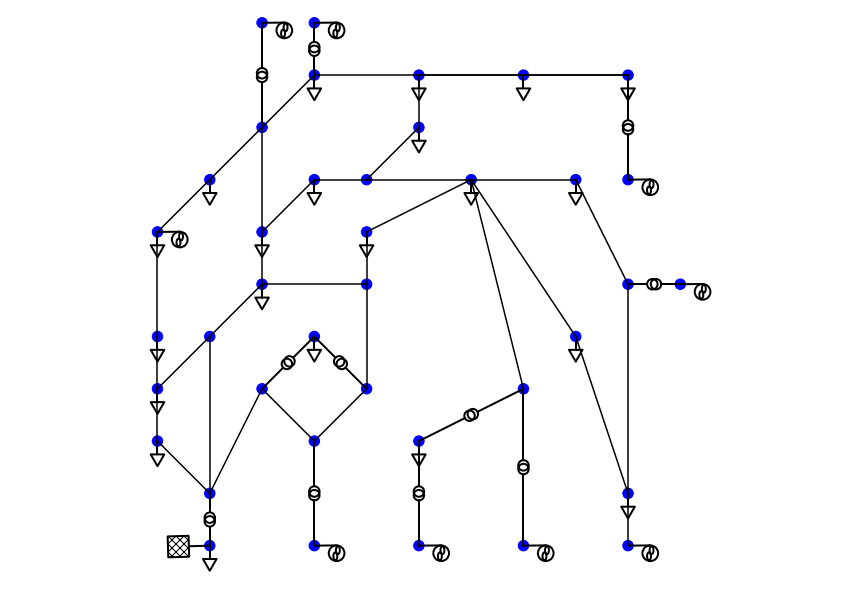

In [12]:
import pylab


def plot_grid():
    bus_col = plot.create_bus_collection(net, color="b", size=0.1, picker=True)
    trafo_col = plot.create_trafo_collection(net, size=0.1)
    line_col = plot.create_line_collection(net, color="k", use_bus_geodata=True)
    ext_grid_col = plot.create_ext_grid_collection(net, size=0.2, orientation=-1.6)
    load_col = plot.create_load_collection(net, size=0.15, orientation=np.pi)
    gen_col = plot.create_gen_collection(net, size=0.15, orientation=1.9)
    #sgen_col = plt.create_sgen_collection(net, size=0.1, infofunc=None, orientation=np.pi)
    plot.draw_collections([bus_col, trafo_col, line_col,
                          ext_grid_col, load_col, gen_col], figsize=(12, 8.5))
    pylab.show()

plot_grid()

# OPF

In [13]:
pp.runopp(net, numba=False)

Pg_0_base = net.res_ext_grid['p_mw'][0]
Pg_1_base = net.res_gen['p_mw'][0]
Pg_2_base = net.res_gen['p_mw'][1]
Pg_3_base = net.res_gen['p_mw'][2]
Pg_4_base = net.res_gen['p_mw'][3]
Pg_5_base = net.res_gen['p_mw'][4]
Pg_6_base = net.res_gen['p_mw'][5]
Pg_7_base = net.res_gen['p_mw'][6]
Pg_8_base = net.res_gen['p_mw'][7]
Pg_9_base = net.res_gen['p_mw'][8]


Pg_base = np.concatenate([np.array(net.res_ext_grid['p_mw']), np.array(net.res_gen['p_mw'])], axis=0)


print('Pg0 base', Pg_0_base)
print('Pg1 base', Pg_1_base)
print('Pg2 base', Pg_2_base)
print('Pg3 base', Pg_3_base)
print('Pg4 base', Pg_4_base)
print('Pg5 base', Pg_5_base)
print('Pg6 base', Pg_6_base)
print('Pg7 base', Pg_7_base)
print('Pg8 base', Pg_8_base)
print('Pg9 base', Pg_9_base)

gen vm_pu > bus max_vm_pu for gens [5]. Setting bus limit for these gens.


Pg0 base 521.9002109026643
Pg1 base 510.6994517661325
Pg2 base 496.7196845217468
Pg3 base 496.69274866659873
Pg4 base 497.01307822262646
Pg5 base 497.430595596947
Pg6 base 495.5100966083863
Pg7 base 496.6757827255176
Pg8 base 493.6784775800973
Pg9 base 531.5185420088739


In [14]:
a_gen = np.sum(Pg_base)
a_rs = np.sum(net.sgen['p_mw'])
a_load = np.sum(net.load['p_mw'])

diff = a_gen+a_rs-a_load

d = diff*100/(a_load-a_rs)
d = d/100
pro = 1+d
pro

1.0087318102289222

In [15]:
n_loads=21

# Load base
L_P_base = net.load['p_mw']
L_Q_base = net.load['q_mvar']

# RS base
RS_P_base = net.sgen['p_mw']
RS_Q_base = net.sgen['q_mvar']

# Load factor
faktor_load = L_Q_base/L_P_base
# RS factor
faktor_rs = RS_Q_base/RS_P_base


np.random.seed(123)

# Num of iteration
num_sampling = 1500

# Load - Uniform random
alpha_corr = np.random.lognormal(-1, 0.1, num_sampling)

alpha_uncorr = []
for i in range(L_P_base.shape[0]):
    alp_unc = list(np.random.lognormal(1, 0.05, num_sampling))
    alpha_uncorr.append(alp_unc)
    
alpha_uncorr = np.array(alpha_uncorr)

# RS - Uniform random
beta_corr = np.random.uniform(0.2, 0.4, num_sampling)


beta_uncorr = []
for i in range(RS_P_base.shape[0]):
    beta_unc = list(np.random.lognormal(1, 0.3, num_sampling))
    beta_uncorr.append(beta_unc)
    
beta_uncorr = np.array(beta_uncorr)


# Control change
u = []
for i in range(Pg_base.shape[0]):
    u_con = list(np.random.uniform(0.8, 1.2, num_sampling))
    u.append(u_con)

u = np.array(u)

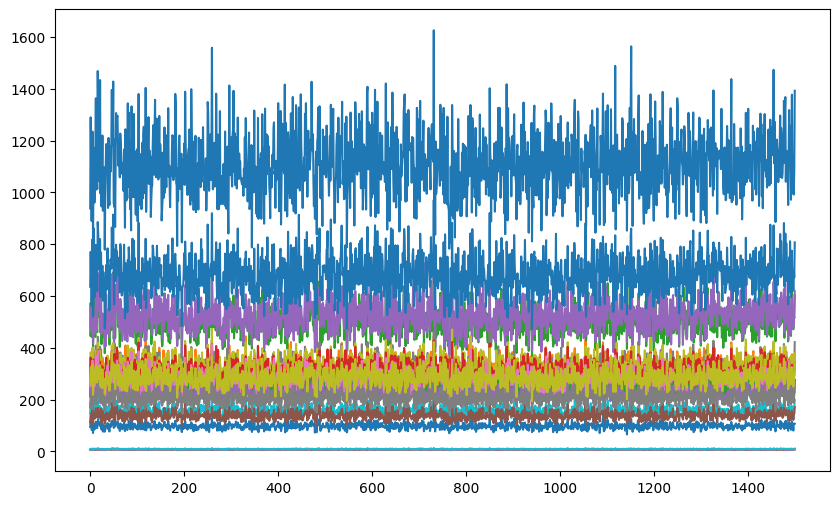

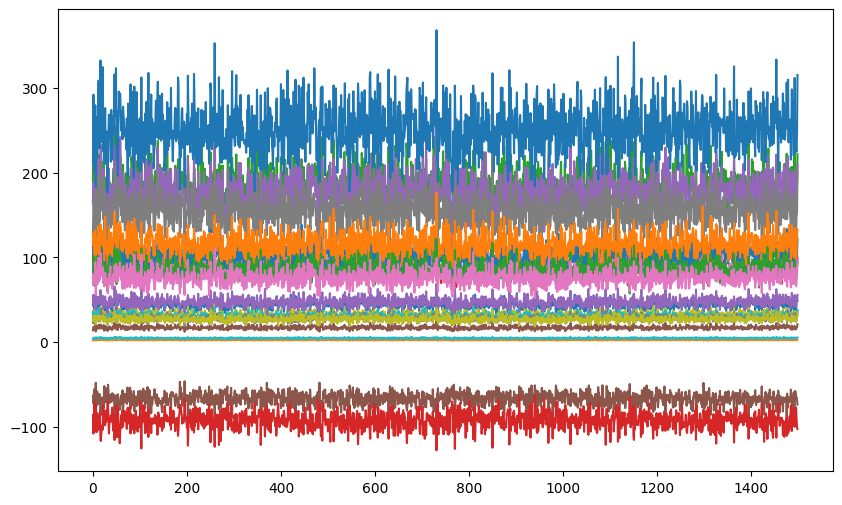

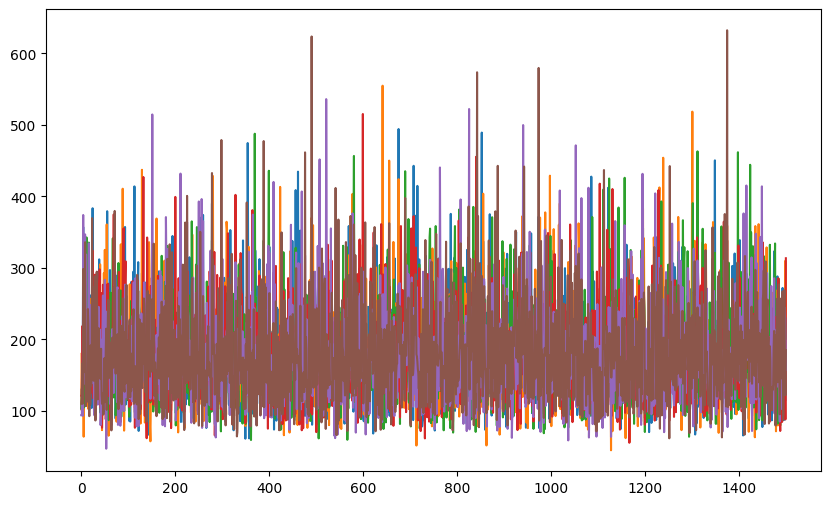

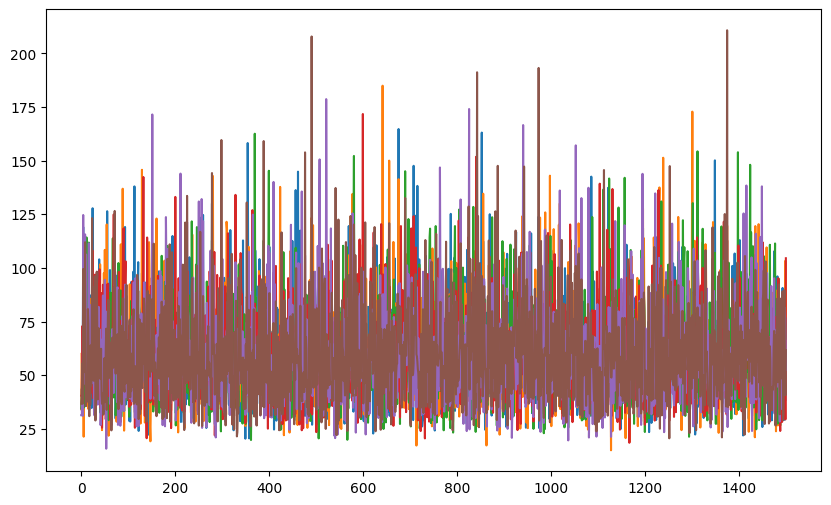

In [16]:
# Load
P_load = []
for i in range(L_P_base.shape[0]):
    load = list(L_P_base[i] * alpha_corr * alpha_uncorr[i])
    P_load.append(load)
    
P_load = np.array(P_load)

Q_load = []
for i in range(L_P_base.shape[0]):
    load = list(P_load[i] * faktor_load[i])
    Q_load.append(load)
    
Q_load = np.array(Q_load)

plt.figure(figsize=(10,6))
for i in range(P_load.shape[0]):
    plt.plot(P_load[i])
    
plt.figure(figsize=(10,6))
for i in range(Q_load.shape[0]):
    plt.plot(Q_load[i])

    
# RS    
P_rs = []
for i in range(RS_P_base.shape[0]):
    rs = list(RS_P_base[i] * beta_corr * beta_uncorr[i])
    P_rs.append(rs)
    
P_rs = np.array(P_rs)


Q_rs = []
for i in range(RS_P_base.shape[0]):
    rs = list(P_rs[i] * faktor_rs[i])
    Q_rs.append(rs)
    
Q_rs = np.array(Q_rs)

plt.figure(figsize=(10,6))
for i in range(P_rs.shape[0]):
    plt.plot(np.abs(P_rs[i]))
    
plt.figure(figsize=(10,6))
for i in range(Q_rs.shape[0]):
    plt.plot(np.abs(Q_rs[i]))

RS0 61.24621500664367 494.13510289059076
RS1 45.02232727959752 554.6935142945018
RS0 59.36149888389774 487.5412027796436
RS1 55.49011425709524 515.1268915954953
RS0 47.23001604917398 535.9320662962417
RS1 61.76390899233593 632.1675866857362


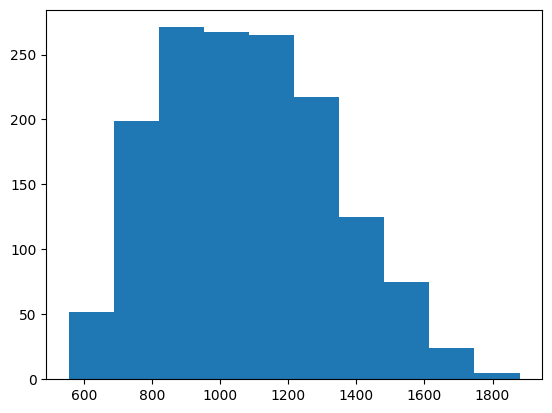

In [17]:
plt.hist(np.abs(P_rs[0]+P_rs[1]+P_rs[2]+P_rs[3]+P_rs[4]+P_rs[5]))
print('RS0',P_rs[0].min(), P_rs[0].max())
print('RS1',P_rs[1].min(), P_rs[1].max())
print('RS0',P_rs[2].min(), P_rs[2].max())
print('RS1',P_rs[3].min(), P_rs[3].max())
print('RS0',P_rs[4].min(), P_rs[4].max())
print('RS1',P_rs[5].min(), P_rs[5].max())

RS0 65.70843708426236 139.40619096017554
RS1 220.2720416019456 444.6907649403835
RS2 350.903262002714 726.2410315950282
RS3 156.91816995317296 345.8266544340689
RS4 344.4819144837508 767.6891268617258
RS5 4.521031776430147 10.06843601118412
RS6 6.046216725683736 12.650187673957948
RS19 5.699806283938306 12.9260483884581


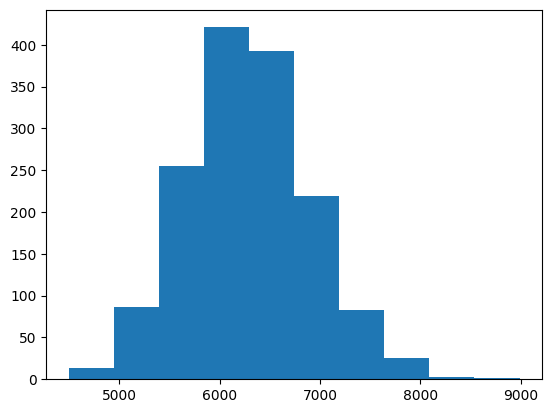

In [18]:
plt.hist(P_load[0]+P_load[1]+P_load[2]+P_load[3]+P_load[4]+P_load[5]+P_load[6]+P_load[7]+P_load[8]+P_load[9]+
         P_load[10]+P_load[11]+P_load[12]+P_load[13]+P_load[14]+P_load[15]+P_load[16]+P_load[17]+P_load[18]+P_load[19]+P_load[20])
print('RS0',P_load[0].min(), P_load[0].max())
print('RS1',P_load[1].min(), P_load[1].max())
print('RS2',P_load[2].min(), P_load[2].max())
print('RS3',P_load[3].min(), P_load[3].max())
print('RS4',P_load[4].min(), P_load[4].max())
print('RS5',P_load[5].min(), P_load[5].max())
print('RS6',P_load[6].min(), P_load[6].max())
print('RS19',P_load[19].min(), P_load[19].max())

# PF

In [20]:
n = net.gen.shape[0]

V_m = pd.DataFrame([])
V_deg = pd.DataFrame([])
P = pd.DataFrame([])
Q = pd.DataFrame([])

P_ij = pd.DataFrame([])

Pg = pd.DataFrame()
Pg_0 = pd.DataFrame()
load_p = pd.DataFrame()
load_q = pd.DataFrame()
rs_p = pd.DataFrame()
rs_q = pd.DataFrame()

P_disturbance = np.concatenate([P_load, P_rs], axis=0) 
Q_disturbance = np.concatenate([Q_load, Q_rs], axis=0)

for i in range(num_sampling):
    
    net.load['p_mw'] = pd.Series(P_load[:,i])
    net.load['q_mvar'] = pd.Series(Q_load[:,i])
    
    net.sgen['p_mw'] = pd.Series(P_rs[:,i])
    net.sgen['q_mvar'] = pd.Series(Q_rs[:,i])
    
    load_p = pd.concat([load_p, net.load['p_mw']], axis=1)
    load_q = pd.concat([load_q, net.load['q_mvar']], axis=1)
    
    rs_p = pd.concat([rs_p, net.sgen['p_mw']], axis=1)
    rs_q = pd.concat([rs_q, net.sgen['q_mvar']], axis=1)
    
    sum_load = net.load['p_mw'].sum() - net.sgen['p_mw'].sum()

    P_first = []
    for j in range(Pg_base.shape[0]):
        p = Pg_base[j] * u[j, i] * pro * (sum_load/np.sum(Pg_base))
        P_first.append(p)
    P_first = np.array(P_first)
    
    
    net.ext_grid['p_mw'] = pd.Series(P_first[0] * pro  * (sum_load/np.sum(P_first)))
    net.gen['p_mw'] = pd.Series(P_first[1:] * pro * (sum_load/np.sum(P_first)))
    
    
    Pg_0 = pd.concat([Pg_0, net.ext_grid['p_mw']], axis=1)
    Pg = pd.concat([Pg, net.gen['p_mw']], axis=1)
    
    
    pp.rundcpp(net, numba=False)
    
    
    
    V_m = V_m.append(pd.DataFrame(net.res_bus['vm_pu']).T)
    V_deg = V_deg.append(pd.DataFrame(net.res_bus['va_degree']).T)
    P = P.append(pd.DataFrame(net.res_bus['p_mw']).T)
    Q = Q.append(pd.DataFrame(net.res_bus['q_mvar']).T)
    
    P_ij = P_ij.append(pd.DataFrame(net.res_line['p_from_mw']).T)
    
    if i == (num_sampling-1):
        V_m = V_m.reset_index(drop=True)
        V_deg = V_deg.reset_index(drop=True)
        P = P.reset_index(drop=True)
        Q = Q.reset_index(drop=True)
        P_ij = P_ij.reset_index(drop=True)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

# Dataset

In [21]:
load_p = load_p.transpose()
load_p = load_p.reset_index()
load_p = load_p.drop(['index'], axis=1)
load_p.columns = ['Load_P1', 'Load_P2' ,'Load_P3','Load_P4', 'Load_P5' ,'Load_P6','Load_P7', 'Load_P8' ,'Load_P9',
                  'Load_P10', 'Load_P11' ,'Load_P12','Load_P13', 'Load_P14' ,'Load_P15','Load_P16', 'Load_P17' ,'Load_P18',
                  'Load_P19' ,'Load_P20', 'Load_P21']

rs_p = rs_p.transpose()
rs_p = rs_p.reset_index()
rs_p = rs_p.drop(['index'], axis=1)
rs_p.columns = ['RS_P1', 'RS_P2', 'RS_P3', 'RS_P4', 'RS_P5', 'RS_P6']


load_q = load_q.transpose()
load_q = load_q.reset_index()
load_q = load_q.drop(['index'], axis=1)
load_q.columns = ['Load_Q1', 'Load_Q2' ,'Load_Q3','Load_Q4', 'Load_Q5' ,'Load_Q6','Load_Q7', 'Load_Q8' ,'Load_Q9',
                  'Load_Q10', 'Load_Q11' ,'Load_Q12','Load_Q13', 'Load_Q14' ,'Load_Q15','Load_Q16', 'Load_Q17' ,'Load_Q18',
                  'Load_Q19' ,'Load_Q20', 'Load_Q21']

rs_q = rs_q.transpose()
rs_q = rs_q.reset_index()
rs_q = rs_q.drop(['index'], axis=1)
rs_q.columns = ['RS_Q1', 'RS_Q2', 'RS_Q3', 'RS_Q4', 'RS_Q5', 'RS_Q6']

In [22]:
Pg0 = pd.DataFrame(Pg_0.iloc[0])
Pg1 = pd.DataFrame(Pg.iloc[0])
Pg2 = pd.DataFrame(Pg.iloc[1])
Pg3 = pd.DataFrame(Pg.iloc[2])
Pg4 = pd.DataFrame(Pg.iloc[3])
Pg5 = pd.DataFrame(Pg.iloc[4])
Pg6 = pd.DataFrame(Pg.iloc[5])
Pg7 = pd.DataFrame(Pg.iloc[6])
Pg8 = pd.DataFrame(Pg.iloc[7])
Pg9 = pd.DataFrame(Pg.iloc[8])

Pg0 = Pg0.reset_index()
Pg0 = Pg0.drop(['index'], axis=1)
Pg0.columns = ['Pg0']

Pg1 = Pg1.reset_index()
Pg1 = Pg1.drop(['index'], axis=1)
Pg1.columns = ['Pg1']

Pg2 = Pg2.reset_index()
Pg2 = Pg2.drop(['index'], axis=1)
Pg2.columns = ['Pg2']

Pg3 = Pg3.reset_index()
Pg3 = Pg3.drop(['index'], axis=1)
Pg3.columns = ['Pg3']

Pg4 = Pg4.reset_index()
Pg4 = Pg4.drop(['index'], axis=1)
Pg4.columns = ['Pg4']

Pg5 = Pg5.reset_index()
Pg5 = Pg5.drop(['index'], axis=1)
Pg5.columns = ['Pg5']

Pg6 = Pg6.reset_index()
Pg6 = Pg6.drop(['index'], axis=1)
Pg6.columns = ['Pg6']

Pg7 = Pg7.reset_index()
Pg7 = Pg7.drop(['index'], axis=1)
Pg7.columns = ['Pg7']

Pg8 = Pg8.reset_index()
Pg8 = Pg8.drop(['index'], axis=1)
Pg8.columns = ['Pg8']

Pg9 = Pg9.reset_index()
Pg9 = Pg9.drop(['index'], axis=1)
Pg9.columns = ['Pg9']

In [23]:
Q = Q.iloc[:, 29:]
Q.columns = ['Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38']

V_m = V_m.iloc[:, :29]
V_m.columns = ['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8','U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18',
               'U19', 'U20', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27','U28']
P_ij.columns = ['P_0_1', 'P_0_38', 'P_1_2', 'P_1_24', 'P_2_3', 'P_2_17', 'P_3_4', 'P_3_13', 'P_4_5', 'P_4_7', 'P_5_6', 'P_5_10', 'P_6_7',
                'P_7_8', 'P_8_38', 'P_9_10', 'P_9_12', 'P_12_13', 'P_13_14', 'P_14_15', 'P_15_16', 'P_15_18', 'P_15_20', 'P_15_23', 'P_16_17', 'P_16_26',
                'P_20_21', 'P_21_22','P_22_23', 'P_22_35', 'P_24_25', 'P_25_26', 'P_25_27', 'P_25_28', 'P_27_28']

In [24]:
df = pd.concat([Pg0, Pg1, Pg2, Pg3, Pg4, Pg5, Pg6, Pg7, Pg8, Pg9, load_p, load_q, rs_p, rs_q, Q, V_m, P_ij], axis=1)

In [25]:
a =df.iloc[:, :10].sum(axis=1)
b = df.loc[:, ['RS_P1', 'RS_P2', 'RS_P3', 'RS_P4', 'RS_P5', 'RS_P6']].sum(axis=1)
c = df.loc[:, ['Load_P1', 'Load_P2', 'Load_P3', 'Load_P4', 'Load_P5', 'Load_P6',
               'Load_P7', 'Load_P8', 'Load_P9', 'Load_P10', 'Load_P11', 'Load_P12',
               'Load_P13', 'Load_P14', 'Load_P15', 'Load_P16', 'Load_P17', 'Load_P18',
               'Load_P19', 'Load_P20', 'Load_P21']].sum(axis=1)

loss = a + b - c 
loss

0       43.603244
1       55.020572
2       48.195661
3       40.129114
4       37.930552
          ...    
1495    48.666464
1496    40.185182
1497    44.571276
1498    47.092493
1499    54.420353
Length: 1500, dtype: float64

In [26]:
pd.set_option('display.max_columns', 200)
df.head(5)

,Pg0,Pg1,Pg2,Pg3,Pg4,Pg5,Pg6,Pg7,Pg8,Pg9,Load_P1,Load_P2,Load_P3,Load_P4,Load_P5,Load_P6,Load_P7,Load_P8,Load_P9,Load_P10,Load_P11,Load_P12,Load_P13,Load_P14,Load_P15,Load_P16,Load_P17,Load_P18,Load_P19,Load_P20,Load_P21,Load_Q1,Load_Q2,Load_Q3,Load_Q4,Load_Q5,Load_Q6,Load_Q7,Load_Q8,Load_Q9,Load_Q10,Load_Q11,Load_Q12,Load_Q13,Load_Q14,Load_Q15,Load_Q16,Load_Q17,Load_Q18,Load_Q19,Load_Q20,Load_Q21,RS_P1,RS_P2,RS_P3,RS_P4,RS_P5,RS_P6,RS_Q1,RS_Q2,RS_Q3,RS_Q4,RS_Q5,RS_Q6,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20,U21,U22,U23,U24,U25,U26,U27,U28,P_0_1,P_0_38,P_1_2,P_1_24,P_2_3,P_2_17,P_3_4,P_3_13,P_4_5,P_4_7,P_5_6,P_5_10,P_6_7,P_7_8,P_8_38,P_9_10,P_9_12,P_12_13,P_13_14,P_14_15,P_15_16,P_15_18,P_15_20,P_15_23,P_16_17,P_16_26,P_20_21,P_21_22,P_22_23,P_22_35,P_24_25,P_25_26,P_25_27,P_25_28,P_27_28
0,490.511441,558.964383,470.241635,548.260136,447.463240,543.128240,402.349417,588.995570,485.346190,501.951779,94.650685,282.437857,448.200165,212.140401,483.070747,6.170723,8.247885,268.155049,292.771130,148.325648,635.762066,272.825842,222.882374,288.095609,217.792876,112.555290,251.695795,169.787870,266.127079,7.829760,938.188599,42.864347,2.105127,164.937661,76.218108,163.429682,-63.226179,85.089550,128.211633,28.743184,28.163098,96.299254,114.507196,76.185248,-86.073931,45.892070,13.765755,67.626450,22.748278,25.251564,3.914880,212.452128,102.888571,102.183697,103.561996,121.380528,93.946679,110.143191,34.296190,34.061232,34.520665,40.460176,31.315560,36.714397,-140.00016,-164.888484,-150.001009,-67.149753,-127.641168,-79.788984,-51.804368,-0.000175,130.625966,138.10317,1.023357,1.054711,1.039158,1.014502,1.013127,1.015474,1.003354,1.001766,1.029128,1.02981,1.024787,1.029748,1.028748,1.026172,1.036618,1.047457,1.046091,1.042121,1.054462,0.990022,1.043264,1.056933,1.052051,1.055713,1.06,1.058773,1.047444,1.052992,1.050721,-398.637600,303.986915,472.510811,-209.295456,197.406589,-7.333635,2.940847,-253.734423,-378.795345,381.736191,451.895586,-391.612494,239.755185,138.420629,132.249906,334.845536,135.396099,172.564954,-81.169469,-245.762521,198.428698,-359.961310,-284.040376,-92.960663,155.659283,42.769414,-556.866218,107.642550,287.109593,-402.349417,161.907238,208.926380,-59.276842,-100.297591,-229.064711
1,754.841411,752.712791,634.619979,581.763475,606.937162,637.709807,547.354742,585.303811,552.446331,702.495541,117.065892,366.781245,573.462838,229.126193,555.677462,7.067178,9.343665,343.201384,382.764839,189.917627,770.723434,307.485277,297.463898,361.795225,264.622275,145.544313,299.560200,223.221147,317.863015,9.774603,1290.022971,53.015496,2.733773,211.034324,82.320788,187.993563,-72.411390,96.394202,164.093162,37.578433,36.060309,116.741932,129.054040,101.678569,-108.093065,55.759694,17.800384,80.486815,29.907299,30.160547,4.887301,292.124767,131.005351,181.076516,114.334880,123.204133,93.830899,117.868423,43.668450,60.358839,38.111627,41.068044,31.276966,39.289474,-140.00016,-164.888484,-150.001009,-67.149753,-127.641168,-79.788984,-51.804368,-0.000175,130.625966,138.10317,1.023357,1.054711,1.039158,1.014502,1.013127,1.015474,1.003354,1.001766,1.029128,1.02981,1.024787,1.029748,1.028748,1.026172,1.036618,1.047457,1.046091,1.042121,1.054462,0.990022,1.043264,1.056933,1.052051,1.055713,1.06,1.058773,1.047444,1.052992,1.050721,-472.749658,355.683766,519.527432,-108.558948,119.541294,33.204893,-132.994095,-320.927448,-594.135216,461.141120,562.573377,-466.662357,333.447183,238.910842,231.843664,375.115867,259.504112,339.690473,18.763026,-210.103478,260.464068,-417.977203,-349.139738,-86.215443,156.712734,103.751333,-656.625016,104.288924,354.179769,-547.354742,212.122588,195.808866,-37.650181,-91.580410,-260.871329
2,657.411510,629.135613,626.287120,533.958290,449.418676,427.603527,458.615726,621.556364,544.540532,619.218085,97.789846,351.263486,507.762521,235.184661,519.633018,6.818963,9.023417,348.559299,356.644584,153.711492,667.057681,285.388726,272.84514

In [27]:
df.describe()

,Pg0,Pg1,Pg2,Pg3,Pg4,Pg5,Pg6,Pg7,Pg8,Pg9,Load_P1,Load_P2,Load_P3,Load_P4,Load_P5,Load_P6,Load_P7,Load_P8,Load_P9,Load_P10,Load_P11,Load_P12,Load_P13,Load_P14,Load_P15,Load_P16,Load_P17,Load_P18,Load_P19,Load_P20,Load_P21,Load_Q1,Load_Q2,Load_Q3,Load_Q4,Load_Q5,Load_Q6,Load_Q7,Load_Q8,Load_Q9,Load_Q10,Load_Q11,Load_Q12,Load_Q13,Load_Q14,Load_Q15,Load_Q16,Load_Q17,Load_Q18,Load_Q19,Load_Q20,Load_Q21,RS_P1,RS_P2,RS_P3,RS_P4,RS_P5,RS_P6,RS_Q1,RS_Q2,RS_Q3,RS_Q4,RS_Q5,RS_Q6,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20,U21,U22,U23,U24,U25,U26,U27,U28,P_0_1,P_0_38,P_1_2,P_1_24,P_2_3,P_2_17,P_3_4,P_3_13,P_4_5,P_4_7,P_5_6,P_5_10,P_6_7,P_7_8,P_8_38,P_9_10,P_9_12,P_12_13,P_13_14,P_14_15,P_15_16,P_15_18,P_15_20,P_15_23,P_16_17,P_16_26,P_20_21,P_21_22,P_22_23,P_22_35,P_24_25,P_25_26,P_25_27,P_25_28,P_27_28
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.00000,1.500000e+03,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.00000,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,545.400104,531.522223,515.368806,518.259405,520.044029,520.095689,516.931202,516.620242,515.075280,555.480788,98.082167,324.749131,502.738772,235.435867,524.503584,6.535182,8.593257,322.375149,330.653517,158.964799,683.608167,275.387193,248.217871,310.403707,224.948612,139.404537,282.915899,207.239412,285.321625,9.258682,1110.616107,44.418358,2.420490,185.007868,84.587737,177.446998,-66.960482,88.652591,154.135618,32.462336,30.183190,103.546531,115.582216,84.845381,-92.738891,47.399886,17.049476,76.014770,27.766057,27.072846,4.629341,251.498213,180.581426,180.152366,180.600543,179.617901,179.263224,180.426724,60.193809,60.050789,60.200181,59.872634,59.754408,60.142241,-140.00016,-164.888484,-150.001009,-67.149753,-1.276412e+02,-79.788984,-51.804368,-0.000175,1.306260e+02,138.10317,1.023357e+00,1.054711,1.039158e+00,1.014502e+00,1.013127e+00,1.015474e+00,1.003354e+00,1.001766e+00,1.029128e+00,1.02981,1.024787,1.029748e+00,1.028748e+00,1.026172e+00,1.036618e+00,1.047457e+00,1.046091e+00,1.042121,1.054462,0.990022,1.043264e+00,1.056933,1.052051e+00,1.055713e+00,1.060000e+00,1.058773e+00,1.047444e+00,1.052992e+00,1.050721,-452.994313,354.912146,426.872544,-167.763207,170.913898,-68.790485,-5.796187,-326.028687,-449.359761,443.563574,523.134232,-481.839287,287.698365,206.758355,200.223173,383.679342,131.689464,205.088628,-120.940058,-262.714664,323.226332,-354.695268,-356.278317,-205.620928,227.755284,95.471048,-631.66551

# Save

In [33]:
df.to_csv(module_path + '\\IEEE39\\datasets\\dataset_pandapower_DC.csv')